<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393/578 Máquinas de Aprendizaje - 2019-1 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>

<H3 align='center'> Camilo Maldonado - 201573013-K </H3>
<H3 align='center'> Diego Córdova - 201403009-6 </H3>

**Temas**  
* Manipulaciones básicas en pandas
* Preprocesamiento y exploración inicial de datos
* Regresión Lineal Multivariada
* PCA, LDA
* Selección de atributos _from scratch_, Métodos Wrapper e Información Mutual
* Selección de modelos por _Cross Validation_


**Formalidades**  
* Equipos de trabajo de 2 personas (*Ambos estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos). Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o un por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_ ( en caso de ser repositorio privado, invitar como colaborador al usuario de github "avalderr") al correo electrónico del ayudante (*<alvaro.valderrama.13@sansano.usm.cl>*), en copia al profesor (*<cvalle@inf.utfsm.cl>*). Especificar el siguiente asunto: [INF393/578-2019 Tarea1]
* Fecha de entrega y presentaciones: 26 de Abril. Hora límite de entrega: 23:00. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail. 

<hr style="height:2px;border:none"/>

La tarea se divide en tres partes:

[1.](#primero) Aprendizaje con regresión lineal  
[2.](#segundo) Análisis de audios como datos brutos  
[3.](#tercero) Análisis de emociones en tweets

La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo solo son guias y pueden ser creativos al momento de resolver la tarea. Soluciones creativas o elegantes seran valoradas. También en algunas ocaciones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.
Recuerden intercalar su código con comentarios y con celdas _Markdown_ con los comentarios de la pregunta y con cualquier analisis, fórmula o explicación que les parezca relevante para justificar sus procedimientos. 
Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará mucho la elección en si, en cambio la argumentación detrás de la elección será lo más ponderado.
Si algun modelo se demora demasiado en correr en su maquina, no olvide que puede correr _Jupyter Notebooks_ en _Collab_ de Google, esto puede ser relevante para las maquinas más lentas al momento de realizar exploraciones con _K-folds_.

<a id="segundo"></a>
## 2. Selección de Atributos. 

En esta segunda parte de la tarea estudiaremos un _dataset_ llamado "House Sales in King County", un conjunto de datos de ventas de casas, con diversa información sobre las casas vendidas y los precios de venta. Por la naturaleza variada de las casas y las percepciones de las personas que las compran el problema de predecir el valor de una casa a ser vendida resulta interesante pues si bien muchos supuestos razonables se cumplen la mayoría de las veces (una casa más grande suele costar más que una más chica), la percepción de los compradores puede cambiar mucho por caracteristicas dificiles de medir. 

<img src="https://pngimage.net/wp-content/uploads/2018/06/house-for-sale-sign-png-6.png"  style="height:14cm;"  />

Sin embargo, resulta facil imaginar que algunos de los datos resultan más relevantes que otros al momento de predecir, por esto haremos selección de atributos en esta parte de la pregunta. Este _dataset_ es mucho más limpio que lo usual, por lo cual la exploración inicial sera bastante corta. Luego de explorar los datos deberan realizar una exploración de los distintos atributos para evaluar que tan relevantes son en la predicción del resultado. Puede descargar el _dataset_ desde https://www.kaggle.com/harlfoxem/housesalesprediction donde también encontrará una descripción de las distintas columnas.

### 2.a Carga de datos 

Cargue los datos a un DataFrame. Transformaremos la columna "date" como indica el siguiente código. Que transformación realiza este código? Elimine las columnas que le parezca pertinente. 

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [0]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data (2).csv


In [0]:
data = pd.read_csv("kc_house_data.csv")

In [0]:
data_pre = data
data_pre.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
print(data_pre.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


#### Valores NA y componentes principales

In [0]:
print("Valores NA por columna:")
print(data_pre.isna().sum())
print("Descripción de los atributos:")
print(data_pre.describe())

Valores NA por columna:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
Descripción de los atributos:
                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.25000

##### Comentario

Se puede apreciar que no tenemos valores NAN. Se puede apreciar que los valores están todos en diferentes escalas por lo que será necesario escalarlos.

#### Transformación de columna 'date'

In [0]:
def to_num(date):
    nums = list(date)
    res = 0
    for i in range(8):
        res = res + int(nums[i])*(10**(7-i))
    return res
data_pre['date'] = data_pre.date.apply(to_num).rank()

**Resultado transformación**: Lo que hace esta función es transformarnos una fecha en formato aaaammdd (año mes día) a su valor numérico en días. Luego con la función rank, se esta reemplazando cada fecha, con la posición (índice) de dicha fecha si es que todas estas fueran ordenadas de menor a mayor. Es decir lo que se esta haciendo es que todas las fechas esten a "1" de distancia de la fecha que viene después, y a 1 de distancia de la fecha que vendría antes (En caso de ser la misma fecha, ambos números serían el mismo luego de estas transformaciones)*texto en cursiva*.

#### Descartando atributos
Descartamos el "id", el año de renovación (este podría haber servido pero la mayoría de las casas tiene un año de renovación 0 si no se han renovado), el zipcoda, y las coordenadas de longitud y latitud, debido a que no creemos que tenga una dependencia lineal con el precio.

In [0]:
data_pre = data_pre.drop(columns=['id','yr_renovated','zipcode','lat','long'])

### 2.b Preprocesamiento de los datos y visualización
Escale los datos de la misma forma que en la pregunta 1. Realice _Scatter plots_ de algunas pares (atributo, precio) que ustedes crean sean más significativos. Comente.

En este caso es recomendable estandarizar "a mano", pues mantener la estructura de DataFrame facilitará el ítem siguiente. En todo caso, puede elegir la opción que prefiera. 

Si la curiosidad, imaginación y tiempo le alcanza pruebe también realizando algunas transformaciones simples (logaritmica, cuadrática, _etc._)

[//]: <> ( https://vignette.wikia.nocookie.net/inciclopedia/images/6/6a/Bob_esponja_caja_de_imaginacion.JPG/revision/latest?cb=20081122000821 )

In [0]:
data_pre_train, data_pre_temp = train_test_split(data_pre, test_size= 0.25)
data_pre_val, data_pre_test = train_test_split(data_pre_temp, test_size= 0.4)

data_x_train = data_pre_train.drop(columns='price')
data_y_train = data_pre_train[['price']]
data_x_val = data_pre_val.drop(columns='price')
data_y_val = data_pre_val[['price']]
data_x_test = data_pre_test.drop(columns='price')
data_y_test = data_pre_test[['price']]


In [0]:
x_tr, x_val,x_test = data_x_train.copy() ,data_x_val.copy() ,data_x_test.copy()
y_tr, y_val, y_test = data_y_train.copy() ,data_y_val.copy() ,data_y_test.copy()

scaler_x = StandardScaler()
scaler_x.fit(data_x_train)

x_tr[x_tr.columns] = scaler_x.transform(data_x_train) #scaled
x_val[x_val.columns] = scaler_x.transform(data_x_val)
x_test[x_test.columns] = scaler_x.transform(data_x_test)

scaler_y = StandardScaler()
scaler_y.fit(data_y_train.values.reshape(-1,1))

y_tr[y_tr.columns] = scaler_y.transform(data_y_train.values.reshape(-1,1)) 
y_val[y_tr.columns] = scaler_y.transform(data_y_val.values.reshape(-1,1))
y_test[y_tr.columns] = scaler_y.transform(data_y_test.values.reshape(-1,1))



/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


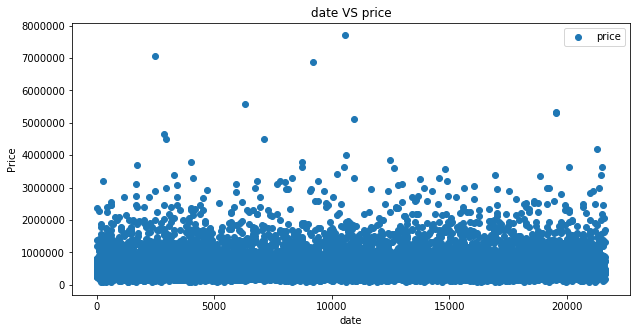

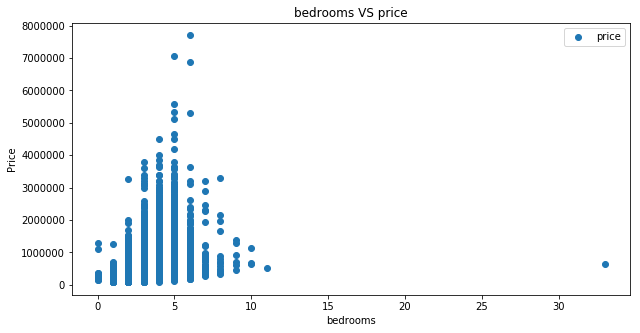

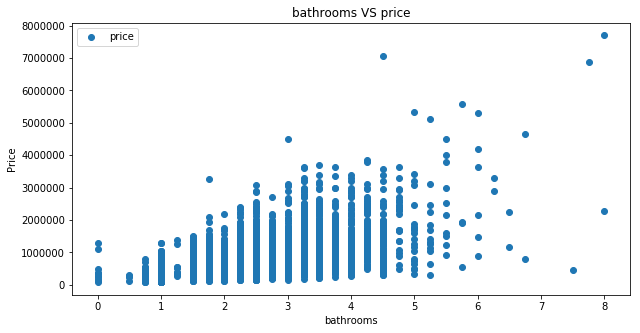

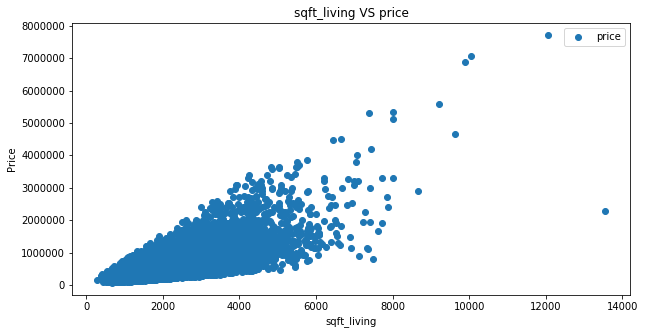

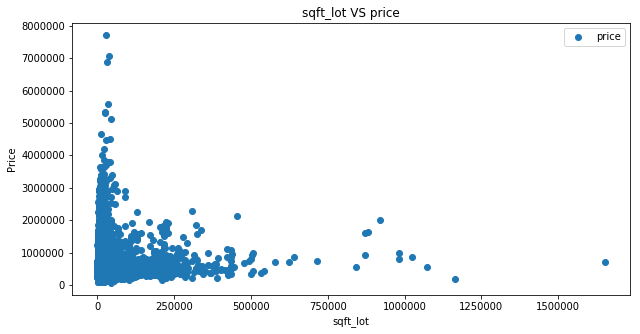

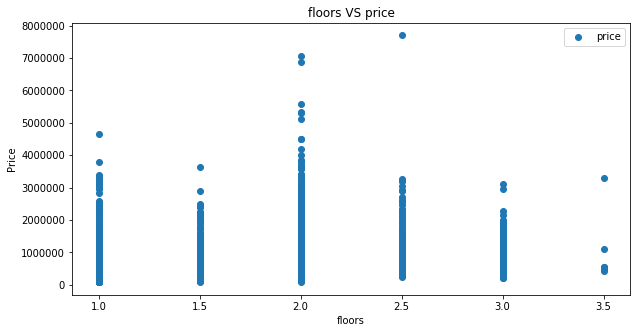

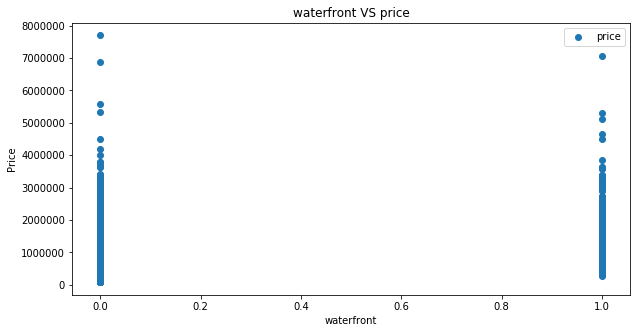

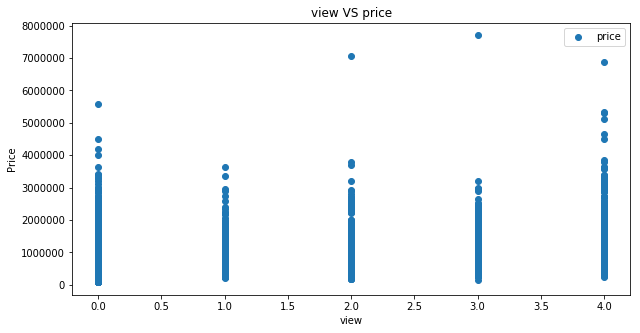

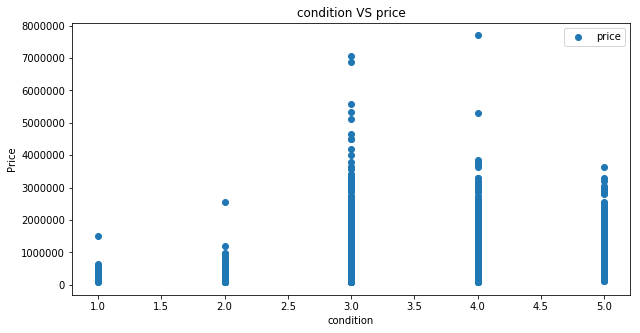

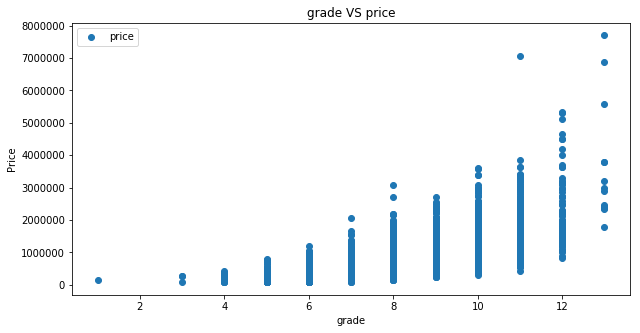

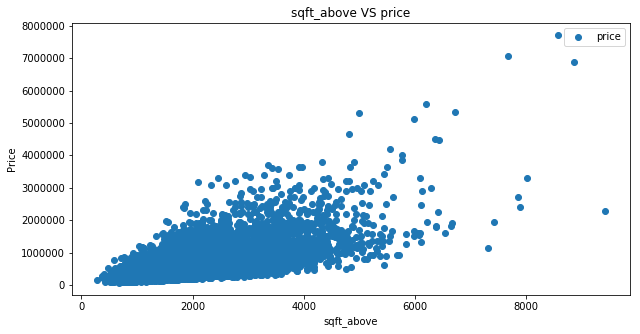

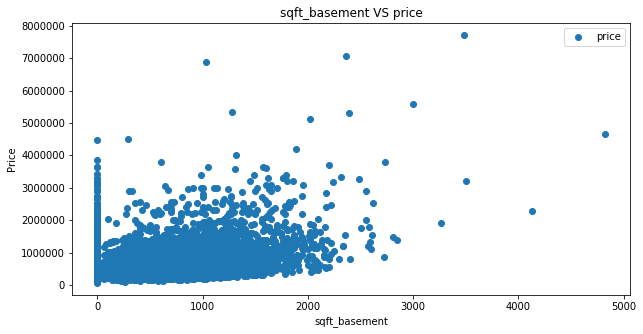

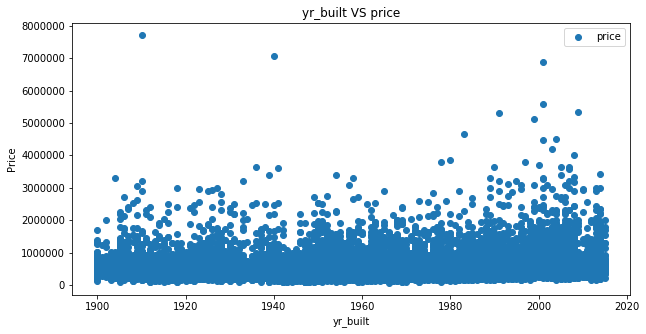

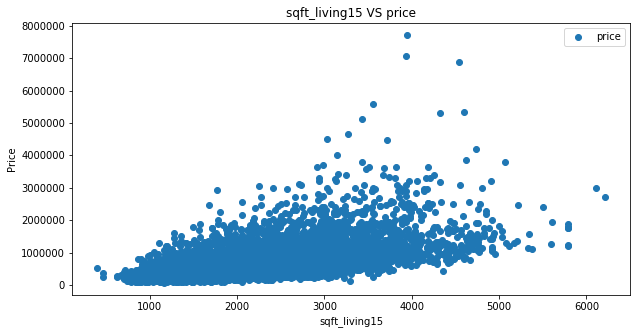

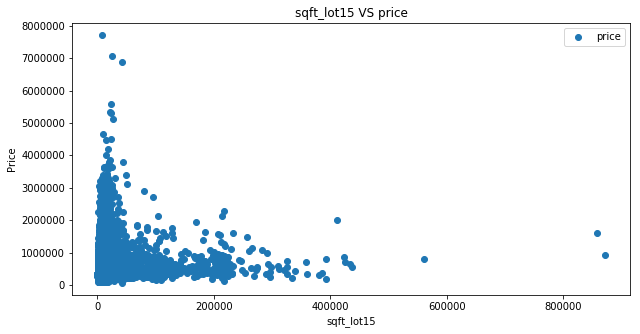

In [0]:
for col in data_pre.columns:
    if col != 'price':
        plt.figure(figsize=(10,5))
        plt.scatter(data_pre[col],data_pre['price'])
        
        plt.xlabel(col)
        plt.ylabel("Price")
        plt.title(col+" VS price")
        plt.legend()
        plt.show()

##### Análisis

Podemos apreciar que las variables que mejor se comportan son las de superficies pies cuadrados de la casa. En particular el área de "living", "above", "living15",  (Area en año 2015, luego de ampliaciones), "bathrooms", se comportan linealmente. Las que parecen tener menos relación con el target son "date" y el "yr_built" (Año de contrucción)

### 2.c Selección de Atributos _by hand_
En esta parte comensaremos entrenando un modelo sin ningun atributo y luego iremos agregando 1 a 1 el atributo que más mejora los resultados de la predicción. En cada paso validaremos qué atributo es el mejor utilizando 5-_fold_ como aprendió en la pregunta anterior. 
Para el modelo sin ningun atributo utilizaremos una predicción constante igual al promedio de los datos de entrenamiento. Luego, en cada iteración, evaluaremos cada uno de los atributos restantes, viendo cual reduce más el error. El error que utilizaremos para esta pregunta sera el MSE o _Mean Square Error_. Luego de elegido un atributo, lo agregamos a la lista de atributos a utilizar y continuamos iterando hasta agotar los atributos restantes. 
Guarde los errores promedio a medida va agregando atributos al modelo y guarde la lista de los atributos que fue agregando, luego grafíque el error promedio en función del nuemero de atributos seleccionado.
Cual es el modelo que entrenga un menor error de validación (cual es su lista de atributos)?

In [0]:
restantes = list(x_tr.columns)
actuales = []
error_actual = ((y_tr-y_tr.mean())**2).mean()
errores = list()
errores.append(error_actual)
folds = KFold(5)

In [0]:

while restantes:
    att_scores = list()
    for atributo_candidato in restantes:
        fold_scores = list()
        x_tr_cross = x_tr[actuales+[atributo_candidato]]
        
        for train_index, test_index in folds.split(x_tr_cross):       
            X_train_cross, X_test_cross = x_tr_cross.iloc[train_index,:], x_tr_cross.iloc[test_index,:]
            y_train_cross, y_test_cross = y_tr.iloc[train_index,:], y_tr.iloc[test_index,:]

            # entrene el modelo y guarde su score
            model = LinearRegression()
            model.fit(X_train_cross, y_train_cross)
            y_pred = model.predict(X_test_cross)
            error = mean_squared_error(y_pred, y_test_cross)
            fold_scores.append(error)
        att_scores.append((sum(fold_scores)/len(fold_scores), atributo_candidato))
    
    att_scores.sort()
    print(att_scores)
    elegido = att_scores[0]
    errores.append(elegido[0])
    actuales.append(elegido[1])
    restantes.remove(elegido[1])


[(0.5104931859426504, 'sqft_living'), (0.5604817701641516, 'grade'), (0.6365155348519076, 'sqft_above'), (0.6649224762476199, 'sqft_living15'), (0.7317070191050944, 'bathrooms'), (0.8345236923220811, 'view'), (0.8940717555439693, 'sqft_basement'), (0.900094458126385, 'bedrooms'), (0.919847464698552, 'waterfront'), (0.9309080602775855, 'floors'), (0.9911524997916631, 'sqft_lot'), (0.9936537701060668, 'sqft_lot15'), (0.9976669552074509, 'yr_built'), (0.9989208488832257, 'condition'), (1.0002482012324796, 'date')]
[(0.4648891937605539, 'view'), (0.46666235033110415, 'waterfront'), (0.4705568925433661, 'grade'), (0.47800644288986255, 'yr_built'), (0.4959664081387407, 'bedrooms'), (0.5046413595363143, 'condition'), (0.5054691042730256, 'sqft_living15'), (0.5081839372995874, 'sqft_lot15'), (0.5096671390428235, 'sqft_lot'), (0.5102632431851741, 'date'), (0.5103373240760156, 'sqft_above'), (0.5103373240760157, 'sqft_basement'), (0.5103717726952557, 'floors'), (0.5104731548421779, 'bathrooms')]

No handles with labels found to put in legend.


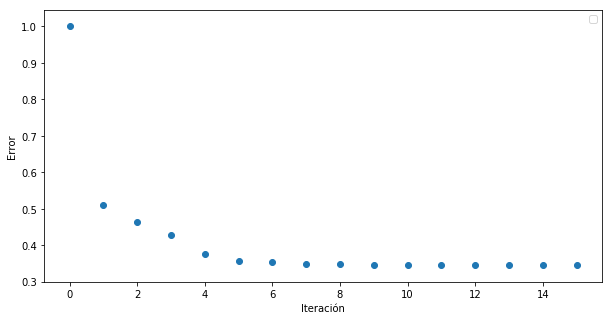

In [0]:
plt.figure(figsize=(10,5))
plt.scatter(list(range(len(errores))),errores)

plt.ylabel("Error")
plt.xlabel("Iteración")
plt.legend()
plt.show() 

##### Análisis

Se utilizó el error cuadratico para ir miendo la mejora del modelo.
Se puede apreciar una mejra considerable, sobre todo con los primeros 5 o 6 atributos elegidos.
El orden en que se eligieron los atributos se conversará en el item siguiente.

### 2.d Validar
Utilizando la lista de atributos que calculó en la pregunta anterior, realice un gráfico de como varía el error de entrenamiento (error sobre `x_tr`) y de validación (sobre `x_val`) a medida va agregando los atributos. Comente como sus hallazgos se relacionan con lo aprendido teóricamente. 

In [0]:
for i in actuales:
    print(i)

sqft_living
view
grade
yr_built
waterfront
bedrooms
bathrooms
sqft_lot15
floors
date
condition
sqft_living15
sqft_lot
sqft_above
sqft_basement


##### Análisis

 Aquí se puede apreciar como el area de "living" es la variable que mas mejora el error en primera instancia, y coincide con que en los gráficos haya parecido la mas prometedora por su comportamiento linal.
 
 Extrañamente el año de construcción aparece bastante arriba, siendo que no tenía relación alguna, al igual que "date", que no aparece abajo del todo.

No handles with labels found to put in legend.


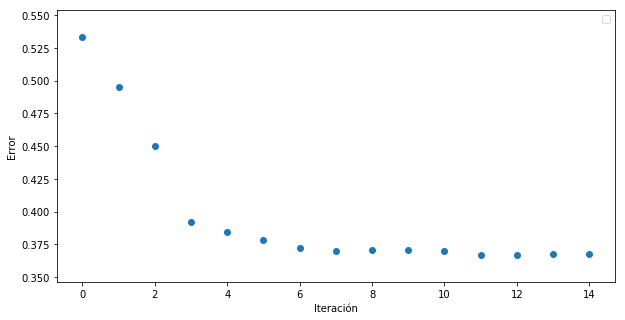

In [0]:
errors = list()
for i in range(len(actuales)):
    model = LinearRegression()
    model.fit(x_tr[actuales[:i+1]], y_tr)
    y_pred = model.predict(x_test[actuales[:i+1]])
    error = mean_squared_error(y_pred, y_test)
    errors.append(error)
   
plt.figure(figsize=(10,5))
plt.scatter(list(range(len(errors))),errors)

plt.ylabel("Error")
plt.xlabel("Iteración")
plt.legend()
plt.show() 
    
    

##### Análisis

Podemos apreciar un aumento significativo en las primeras 6 iteraciones. Luego el error sigue bajando pero en mucha menor escala. 
Concluimos que la selección de atributos hecha en la sección anterior si tuvo resultado.

### 2.e Mutual information
Calcule la Información Mutual para nuestros datos. Note que esta función ya esta implementada.
Que información puede obtener de estos resultados? Concuerdan los datos encontrados con lo encontrado en la pregunta anterior? 

In [0]:
from sklearn.feature_selection import mutual_info_regression
MI = list(zip(mutual_info_regression(x_tr, y_tr),x_tr.columns))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


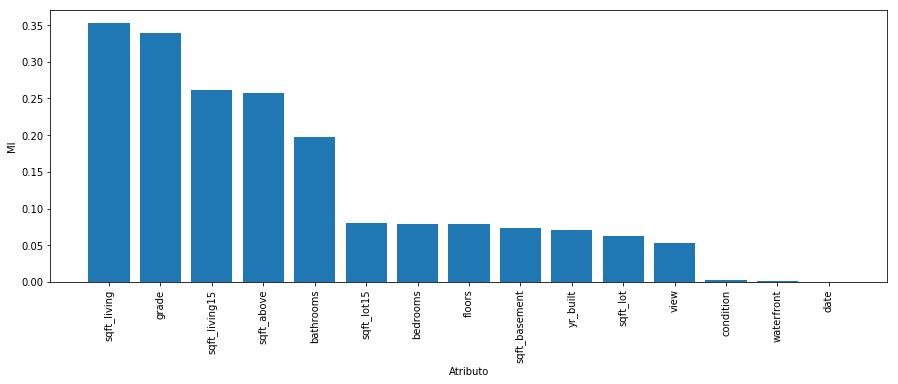

In [0]:
MI.sort(reverse=True)

plt.figure(figsize=(15,5))
plt.bar(list(map(lambda x: x[1], MI)), list(map(lambda x: x[0], MI)))
plt.plot()

plt.xticks(rotation=90)
plt.ylabel("MI")
plt.xlabel("Atributo")

plt.show()

In [0]:
for i in actuales:
    print(i)

sqft_living
view
grade
yr_built
waterfront
bedrooms
bathrooms
sqft_lot15
floors
date
condition
sqft_living15
sqft_lot
sqft_above
sqft_basement


##### Análisis

Mutual informatión nos entrega una especie de correlación entre las variables de entrada y el target. Podemos apreciar que el area de "living" es nuevamente la mejor variable para esta tarea de predicción. El orden se parece en cierta medida al orden anterior, pero no debería porque ser el mismo. Como se discutió en clases, al seleccionar atributos a mano, los atributos que entran están teniendo en consideración a los atributos elegidos anteriormente. No es solo "El que mas mejora el error", es "Es que mas mejora el error en conjunto con los atributos anteriores". El mutual information no considera la dependencia entre las variables de entrada por lo que podría no ser útil.

### 2.f Más variables
Repita lo realizado en la pregunta 2.c (incluyendo gráficos) pero agregando la variable categorica `zipcode` utilizando nuevamente `pd.get_dummies`. Esta vez puede optar por no realizar _K-fold_ si no entrenar una sola vez cada modelo pues podría resultar demasiado demandante en tiempo utilizar _K-fold_, aunque siempre es valorado. 
Qué modelo se comporta mejor y por qué cree que sucede esto? 

In [0]:
data = pd.read_csv("kc_house_data.csv")

In [0]:
data['zipcode'].nunique()

70

In [0]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
data.shape

(21613, 21)

In [0]:
data_pre = pd.get_dummies(data.zipcode)
col = list(data.columns)
col.remove('zipcode')
data_pre[col] = data[col]

In [0]:
data_pre.shape

(21613, 90)

In [0]:
def to_num(date):
    nums = list(date)
    res = 0
    for i in range(8):
        res = res + int(nums[i])*(10**(7-i))
    return res

data_pre['date'] = data_pre.date.apply(to_num).rank()
data_pre = data_pre.drop(columns=['id','yr_renovated','lat','long'])

data_pre_train, data_pre_temp = train_test_split(data_pre, test_size= 0.25)
data_pre_val, data_pre_test = train_test_split(data_pre_temp, test_size= 0.4)

data_x_train = data_pre_train.drop(columns='price')
data_y_train = data_pre_train[['price']]
data_x_val = data_pre_val.drop(columns='price')
data_y_val = data_pre_val[['price']]
data_x_test = data_pre_test.drop(columns='price')
data_y_test = data_pre_test[['price']]

x_tr, x_val,x_test = data_x_train.copy() ,data_x_val.copy() ,data_x_test.copy()
y_tr, y_val, y_test = data_y_train.copy() ,data_y_val.copy() ,data_y_test.copy()

scaler_x = StandardScaler()
scaler_x.fit(data_x_train)

x_tr[x_tr.columns] = scaler_x.transform(data_x_train) #scaled
x_val[x_val.columns] = scaler_x.transform(data_x_val)
x_test[x_test.columns] = scaler_x.transform(data_x_test)

scaler_y = StandardScaler()
scaler_y.fit(data_y_train.values.reshape(-1,1))

y_tr[y_tr.columns] = scaler_y.transform(data_y_train.values.reshape(-1,1)) 
y_val[y_tr.columns] = scaler_y.transform(data_y_val.values.reshape(-1,1))
y_test[y_tr.columns] = scaler_y.transform(data_y_test.values.reshape(-1,1))

restantes = list(x_tr.columns)
actuales = []
error_actual = ((y_tr-y_tr.mean())**2).mean()
errores_2 = list()
errores_2.append(error_actual)
folds = KFold(5)

while restantes:
    att_scores = list()
    for atributo_candidato in restantes:
        fold_scores = list()
        x_tr_cross = x_tr[actuales+[atributo_candidato]]
        
        for train_index, test_index in folds.split(x_tr_cross):       
            X_train_cross, X_test_cross = x_tr_cross.iloc[train_index,:], x_tr_cross.iloc[test_index,:]
            y_train_cross, y_test_cross = y_tr.iloc[train_index,:], y_tr.iloc[test_index,:]

            # entrene el modelo y guarde su score
            model = LinearRegression()
            model.fit(X_train_cross, y_train_cross)
            y_pred = model.predict(X_test_cross)
            error = mean_squared_error(y_pred, y_test_cross)
            fold_scores.append(error)
        att_scores.append((sum(fold_scores)/len(fold_scores), atributo_candidato))
    
    att_scores.sort()
    print(att_scores)
    elegido = att_scores[0]
    errores_2.append(elegido[0])
    actuales.append(elegido[1])
    restantes.remove(elegido[1])


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.


[(0.5151191902743248, 'sqft_living'), (0.5525062011061965, 'grade'), (0.641447592638085, 'sqft_above'), (0.6574647100157183, 'sqft_living15'), (0.7277448514111365, 'bathrooms'), (0.8392720450124127, 'view'), (0.8976168113526606, 'sqft_basement'), (0.9064482180674089, 'bedrooms'), (0.9272453739545922, 98004), (0.9324422863016173, 'floors'), (0.9340911949357042, 'waterfront'), (0.9578385930106113, 98039), (0.9584493054865965, 98040), (0.971683699252478, 98112), (0.983729955941951, 98006), (0.9893383040328987, 98042), (0.9894680705717882, 98023), (0.9895244285233028, 98033), (0.9912389726844253, 98168), (0.9912403716977094, 98001), (0.991778254490496, 'sqft_lot'), (0.9919003037405849, 98075), (0.9930396281926133, 98038), (0.9930483336596204, 98002), (0.993396054868503, 98119), (0.9935260170409641, 98105), (0.9936136281667279, 98199), (0.9938257823438208, 'sqft_lot15'), (0.993878605241672, 98109), (0.9940087108849414, 98058), (0.9940098364524832, 98198), (0.9940651086429508, 98106), (0.994

No handles with labels found to put in legend.


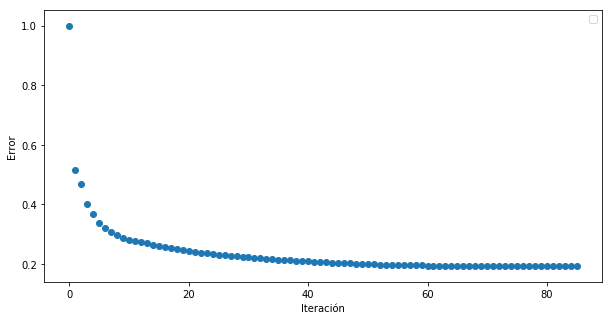

In [0]:
plt.figure(figsize=(10,5))
plt.scatter(list(range(len(errores_2))),errores_2)

plt.ylabel("Error")
plt.xlabel("Iteración")
plt.legend()
plt.show() 

#### Orden de importancia

In [0]:
for i in actuales:
    print(i)

sqft_living
grade
yr_built
98004
waterfront
98039
view
98112
98040
98033
98023
98105
98115
98103
98119
98199
98117
98109
98102
98107
98092
bedrooms
98003
98042
98001
98122
98198
98006
98116
98005
98052
98144
98008
98034
98053
98136
sqft_above
98038
98030
98058
98031
condition
98022
date
floors
bathrooms
98178
98055
98032
98002
98070
98188
98029
98007
98125
98177
98166
98059
98168
98056
98065
98126
sqft_lot
98045
98019
98146
98010
98014
98028
98077
98011
sqft_basement
98148
98133
98108
98106
98155
98072
sqft_lot15
98027
98024
98075
98118
98074
sqft_living15


#### Validando

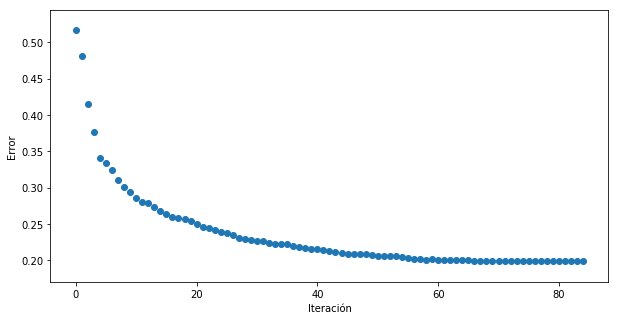

In [0]:
errors = list()
for i in range(len(actuales)):
    model = LinearRegression()
    model.fit(x_tr[actuales[:i+1]], y_tr)
    y_pred = model.predict(x_test[actuales[:i+1]])
    error = mean_squared_error(y_pred, y_test)
    errors.append(error)
   
plt.figure(figsize=(10,5))
plt.scatter(list(range(len(errors))),errors)

plt.ylabel("Error")
plt.xlabel("Iteración")
plt.show() 

#### Análisis y conclusión de esta pregunta

El costo computacional de este itém fue bastante elevado, debido a que se selecciono a mano entre 91 atributos, 21 mas los 70 agregados al desglozar la varaible zipcode en sus 70 categorías. Sin embargo se alcanzó a computar en cerca de 20 minutos, y se puede apreciar una disminución significativa del error en comparación a modelos anteriores. Se e que se comparta bien durante el entrenamiento y al validar con el Test Set.

Muchos de los atributos elegidos al inicio, como puede apreciarse en la lista del orden en que se eligieron los atributos, son tributos que salieron de Zipcode, por lo que se concluye que esta variable era de alto valor predictivo.

La selección de atributos automática siempre casi siempre nos permitirá ver que atributos son los mejores a la hora de seleccionarlos, pero a cambio de muchos computos, debido a que es una manera a "fuerza bruta" por así decirlo. Es por esto que existen técnicas para tratar de ver a priori que atributos se comportarán mejor, como es los indices de correlación vistos en las otras preguntas, y Mutual Information.